In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

model = Sequential()

#input_shape tells the computer how much data to allocate for the NN, (3,3) is the kernal size
model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(rate = 0.3))
model.add(Dense(10, activation = 'softmax'))
          
#helps visualizaiton
model.summary();

#Keras Sequential needs to be compiled to train it and calculate the loss
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta())
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test  = keras.utils.to_categorical(y_test, num_classes=10)

#fit method - train with a data set (x_train) and a set of labels (y_test)/output data. Here the inputs for the fit method are the training data, the training targets (another name for labels), the batch size, and the number of epochs, or times the entire data set will be tested.
model.fit(x_train, y_train, epochs = 5, batch_size = 64)

Using TensorFlow backend.
W0627 09:29:18.194262 139854180132672 deprecation_wrapper.py:119] From /home/idstudent/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 09:29:18.203001 139854180132672 deprecation_wrapper.py:119] From /home/idstudent/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 09:29:18.205073 139854180132672 deprecation_wrapper.py:119] From /home/idstudent/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 09:29:18.223453 139854180132672 deprecation_wrapper.py:119] From /home/idstudent/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.ma

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

W0627 09:29:18.535071 139854180132672 deprecation.py:323] From /home/idstudent/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
60000/60000 [==============================] - 55s 916us/step - loss: 1.2893
Epoch 2/5
60000/60000 [==============================] - 55s 912us/step - loss: 0.0634
Epoch 3/5
60000/60000 [==============================] - 54s 901us/step - loss: 0.0410
Epoch 4/5
60000/60000 [==============================] - 55s 915us/step - loss: 0.0294
Epoch 5/5
60000/60000 [==============================] - 56s 927us/step - loss: 0.0235


My guess is: 4


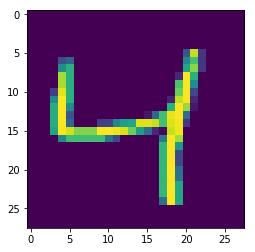

In [2]:
img = x_train[2].reshape(28, 28)
plt.imshow(img)
#plt.show(img)
img = img.reshape(-1, 28, 28, 1)
out = model.predict(img) #y_test/result/output
          
print("My guess is: " + str(np.argmax(out)))